In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
"""#vamoa normalizar ph_foco con valores de 0 a 1
df1cv3['ph_foco'] = (df1cv3['ph_foco'] - df1cv3['ph_foco'].min()) / (df1cv3['ph_foco'].max() - df1cv3['ph_foco'].min())"""


In [38]:
"""#compruebo que no hay nulos en ph_foco , ph_entropia y ph_energia
sum(df1cv3['ph_foco'].isnull()), sum(df1cv3['ph_entropia'].isnull()), sum(df1cv3['ph_energia'].isnull())"""

(0, 0, 0)

In [27]:
"""#creamos una nueva columna que sume pf_foco, pf_entropia y pf_energia
df1cv3['ph_complejidad'] = df1cv3['ph_foco'] + df1cv3['ph_entropia'] + df1cv3['ph_energia']"""

In [28]:
"""#ahora vamos a ver la correlacion con ph_likes
df1cv3.corr()['ph_likes'].sort_values()"""

ph_persona       -0.129751
ph_WB            -0.080186
ph_naturaleza    -0.068323
ph_B             -0.044614
ph_entropia      -0.006097
ph_foco           0.001549
ph_R              0.028308
ph_hora           0.030145
ph_animal         0.033750
ph_complejidad    0.039279
ph_energia        0.048532
ph_G              0.071686
ph_text           0.140569
ph_likes          1.000000
pg_seguidores          NaN
Name: ph_likes, dtype: float64

<AxesSubplot:>

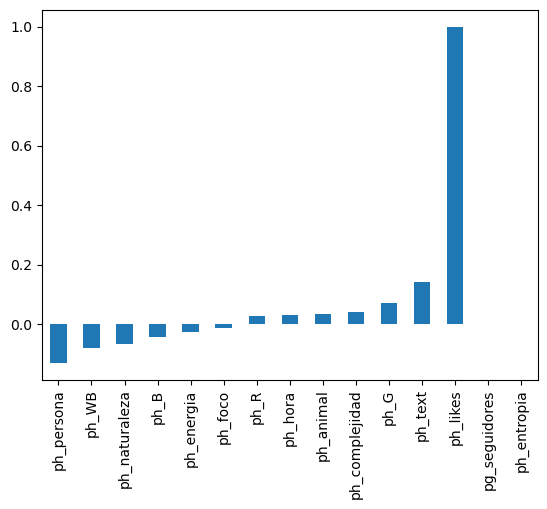

In [58]:
"""#vamos a poner la correlacion en un grafico, sin contar ph_likes
df1cv3.corr()['ph_likes'].sort_values()[:].plot(kind='bar')"""

In [2]:
#vamos a crear una funcion que haga todos los pasos que se han hecho anterioremente
def clean_data(df):
    df.drop(['pg_direccion', 'pg_nombre', 'pg_descripcion', 'pg_numero_de_publicaciones', 'pg_seguidos'], axis=1, inplace=True)
    df.drop(['ph_descripcion', 'ph_url', 'ph_nombre', 'ph_atributos', 'ph_numerado'], axis=1, inplace=True)
    df['ph_foco'] = (df['ph_foco'] - df['ph_foco'].min()) / (df['ph_foco'].max() - df['ph_foco'].min())
    df['ph_complejidad'] = df['ph_foco'] + df['ph_entropia'] + df['ph_energia']
    return df

In [84]:
#vamos a crear la columna ph_complejidad sumando cada valor de las otras 3 columnas ph_foco, ph_entropia y ph_energia
df1cv3_clean['ph_complejidad'] = df1cv3_clean['ph_foco'] + df1cv3_clean['ph_entropia'] + df1cv3_clean['ph_energia']

In [88]:
#vamos a crear la columna ph_complejidad sumando cada valor de las otras 3 columnas ph_foco, ph_entropia y ph_energia en cada dataframe
df2cv3_clean['ph_complejidad'] = df2cv3_clean['ph_foco'] + df2cv3_clean['ph_entropia'] + df2cv3_clean['ph_energia']
df3cv3_clean['ph_complejidad'] = df3cv3_clean['ph_foco'] + df3cv3_clean['ph_entropia'] + df3cv3_clean['ph_energia']
df4cv3_clean['ph_complejidad'] = df4cv3_clean['ph_foco'] + df4cv3_clean['ph_entropia'] + df4cv3_clean['ph_energia']
df5cv3_clean['ph_complejidad'] = df5cv3_clean['ph_foco'] + df5cv3_clean['ph_entropia'] + df5cv3_clean['ph_energia']
df6cv3_clean['ph_complejidad'] = df6cv3_clean['ph_foco'] + df6cv3_clean['ph_entropia'] + df6cv3_clean['ph_energia']
df7cv3_clean['ph_complejidad'] = df7cv3_clean['ph_foco'] + df7cv3_clean['ph_entropia'] + df7cv3_clean['ph_energia']
df10cv3_clean['ph_complejidad'] = df10cv3_clean['ph_foco'] + df10cv3_clean['ph_entropia'] + df10cv3_clean['ph_energia']
df11cv3_clean['ph_complejidad'] = df11cv3_clean['ph_foco'] + df11cv3_clean['ph_entropia'] + df11cv3_clean['ph_energia']

In [42]:
cont = 1
while cont <= 11:
    if cont == 8:
        cont += 1
        pass
    else:
        df = pd.read_csv(f'../data/datos{cont}_cleanRGBCV3.csv')
        df = clean_data(df)
        df.to_csv(f'../data/datos{cont}_cleanRGBCV3_clean.csv', index=False)
        cont += 1

In [20]:
#cargamos todos los datos de los csv del tipo "datos1_clean.csv"
df1 = pd.read_csv('../data/datos1_clean.csv')
df2 = pd.read_csv('../data/datos2_clean.csv')
df3 = pd.read_csv('../data/datos3_clean.csv')
df4 = pd.read_csv('../data/datos4_clean.csv')
df5 = pd.read_csv('../data/datos5_clean.csv')
df6 = pd.read_csv('../data/datos6_clean.csv')
df7 = pd.read_csv('../data/datos7_clean.csv')
df9 = pd.read_csv('../data/datos9_clean.csv')
df10 = pd.read_csv('../data/datos10_clean.csv')
df11 = pd.read_csv('../data/datos11_clean.csv')



In [3]:
#cargamos todos los datos limpios en distintos dataframes
df1cv3_clean = pd.read_csv('../data/datos1_cleanRGBCV3_clean.csv')
df2cv3_clean = pd.read_csv('../data/datos2_cleanRGBCV3_clean.csv')
df3cv3_clean = pd.read_csv('../data/datos3_cleanRGBCV3_clean.csv')
df4cv3_clean = pd.read_csv('../data/datos4_cleanRGBCV3_clean.csv')
df5cv3_clean = pd.read_csv('../data/datos5_cleanRGBCV3_clean.csv')
df6cv3_clean = pd.read_csv('../data/datos6_cleanRGBCV3_clean.csv')
df7cv3_clean = pd.read_csv('../data/datos7_cleanRGBCV3_clean.csv')
df9cv3_clean = pd.read_csv('../data/datos9_cleanRGBCV3_clean.csv')
df10cv3_clean = pd.read_csv('../data/datos10_cleanRGBCV3_clean.csv')
df11cv3_clean = pd.read_csv('../data/datos11_cleanRGBCV3_clean.csv')



In [46]:
#sacamos las correlaciones de cada dataframe con ph_likes
corr1 = df1cv3_clean.corr()['ph_likes'].sort_values()
corr2 = df2cv3_clean.corr()['ph_likes'].sort_values()
corr3 = df3cv3_clean.corr()['ph_likes'].sort_values()
corr4 = df4cv3_clean.corr()['ph_likes'].sort_values()
corr5 = df5cv3_clean.corr()['ph_likes'].sort_values()
corr6 = df6cv3_clean.corr()['ph_likes'].sort_values()
corr7 = df7cv3_clean.corr()['ph_likes'].sort_values()
corr9 = df9cv3_clean.corr()['ph_likes'].sort_values()
corr10 = df10cv3_clean.corr()['ph_likes'].sort_values()
corr11 = df11cv3_clean.corr()['ph_likes'].sort_values()



<AxesSubplot:title={'center':'natgeo'}>

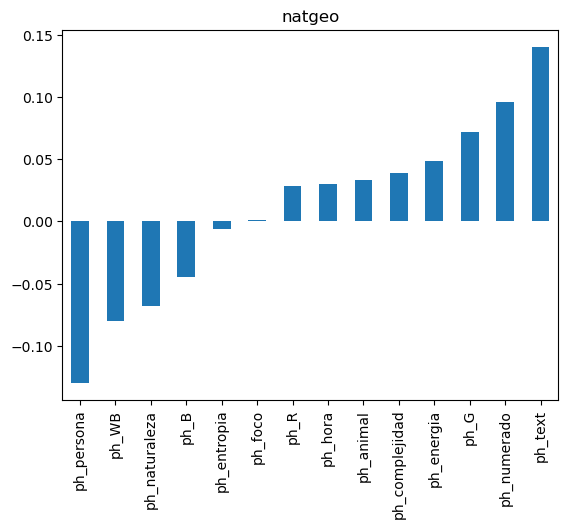

In [89]:
#vamos a ver todos los graficos de barras de correlacion juntos sin ph_seguidores
df1cv3_clean.corr()['ph_likes'].sort_values()[:-2].plot(kind='bar', title='natgeo')





<AxesSubplot:title={'center':'bbctravel'}>

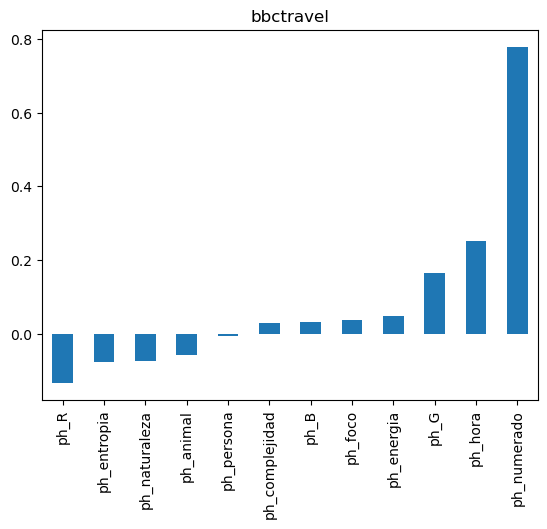

In [90]:
df2cv3_clean.corr()['ph_likes'].sort_values()[:-4].plot(kind='bar', title='bbctravel')

<AxesSubplot:title={'center':'natgeotravel'}>

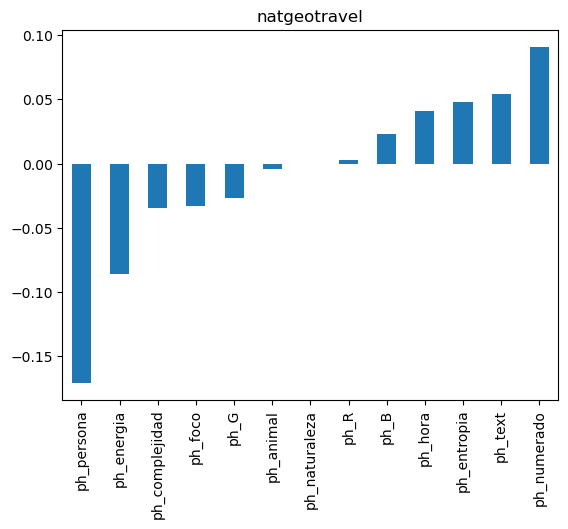

In [91]:
df3cv3_clean.corr()['ph_likes'].sort_values()[:-3].plot(kind='bar', title='natgeotravel')

<AxesSubplot:title={'center':'natgeoadventure'}>

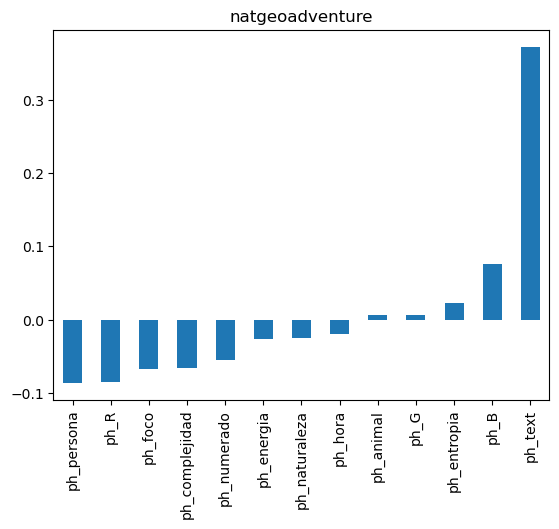

In [92]:
df4cv3_clean.corr()['ph_likes'].sort_values()[:-3].plot(kind='bar', title='natgeoadventure')

In [35]:
df11.head(1)

,pg_direccion,pg_nombre,pg_descripcion,pg_numero_de_publicaciones,pg_seguidores,pg_seguidos,ph_descripcion,ph_likes,ph_fecha,ph_url,...,ph_hora,ph_hashtags,ph_persona,ph_naturaleza,ph_animal,ph_text,ph_R,ph_G,ph_B,ph_WB
0,natgeoespana,National Geographic España,Medios de comunicación\nPerfil oficial de Inst...,27850.0,383000,83,Un buceador nada bajo un gran dosel de algas s...,564,2023-03-15,https://scontent-mad1-1.cdninstagram.com/v/t51...,...,10,[],0,1,0,0,0,0,0,0


In [33]:
df7.shape

(439, 23)

<AxesSubplot:title={'center':'natgeoexpeditions'}>

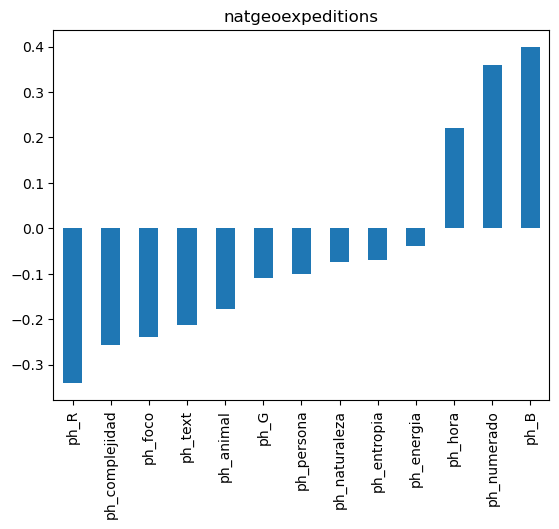

In [93]:
df5cv3_clean.corr()['ph_likes'].sort_values()[:-3].plot(kind='bar', title='natgeoexpeditions')

<AxesSubplot:title={'center':'natgeoyourshot'}>

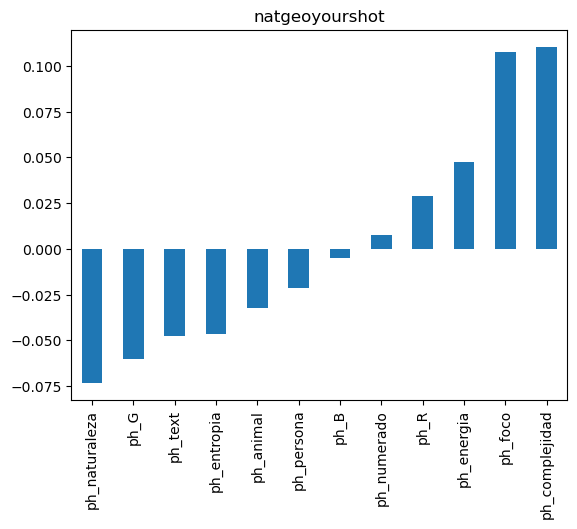

In [94]:
df6cv3_clean.corr()['ph_likes'].sort_values()[1:-3].plot(kind='bar', title='natgeoyourshot')

<AxesSubplot:title={'center':'natgeowild'}>

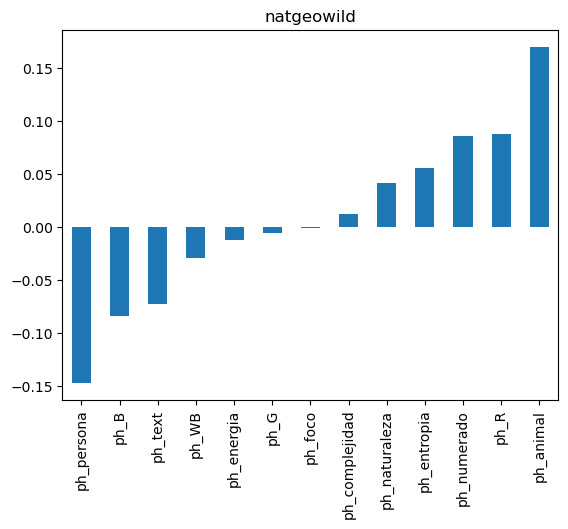

In [95]:
df7cv3_clean.corr()['ph_likes'].sort_values()[:-3].plot(kind='bar', title='natgeowild')

<AxesSubplot:title={'center':'natgeointhefield'}>

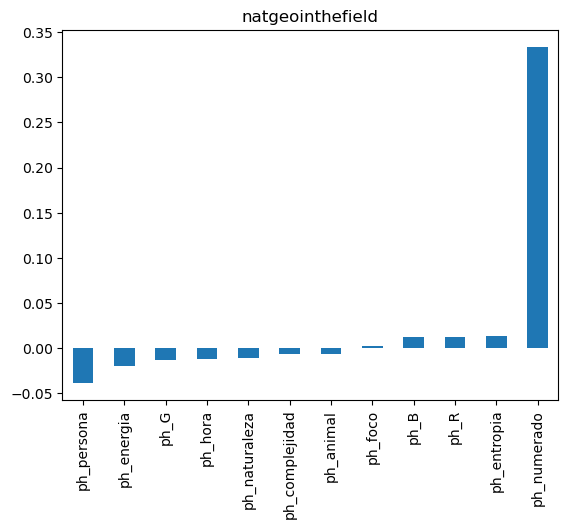

In [96]:
df10cv3_clean.corr()['ph_likes'].sort_values()[:-4].plot(kind='bar', title='natgeointhefield')

<AxesSubplot:title={'center':'natgeoespana'}>

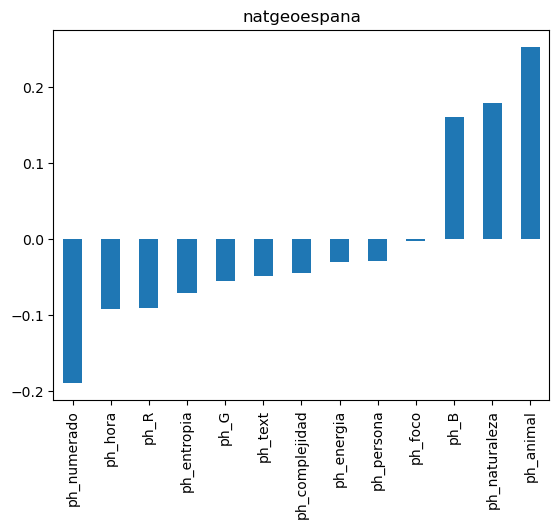

In [97]:
df11cv3_clean.corr()['ph_likes'].sort_values()[:-3].plot(kind='bar', title='natgeoespana')

<AxesSubplot:title={'center':'natgeo'}, xlabel='ph_hora'>

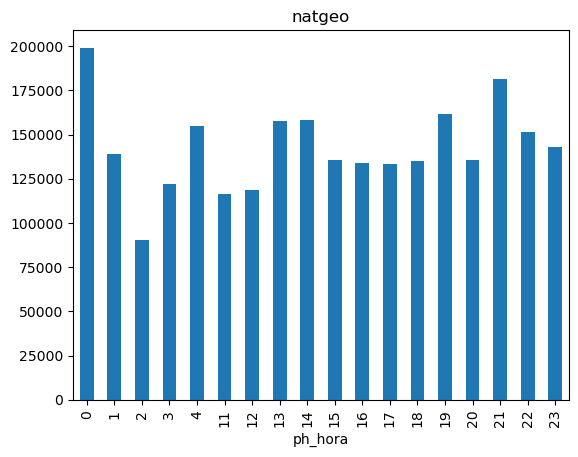

In [68]:
#ahora voy a sacar la media de ph_likes por cada valor en ph_hora
df1cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeo')

<AxesSubplot:title={'center':'bbctravel'}, xlabel='ph_hora'>

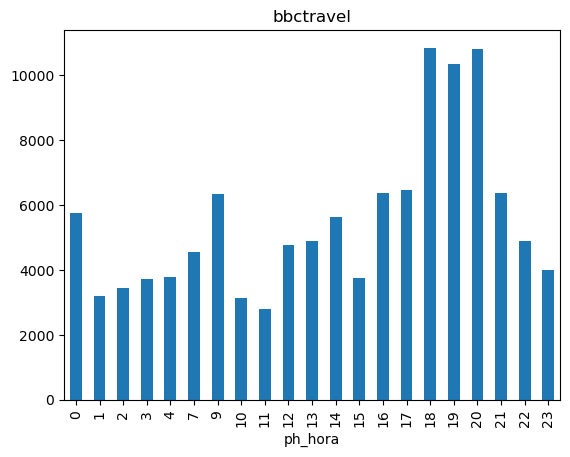

In [69]:
df2cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='bbctravel')

<AxesSubplot:title={'center':'natgeotravel'}, xlabel='ph_hora'>

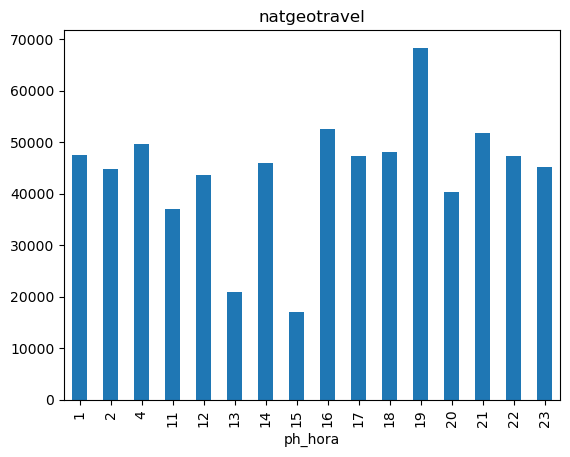

In [70]:
df3cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeotravel')

<AxesSubplot:title={'center':'natgeoadventure'}, xlabel='ph_hora'>

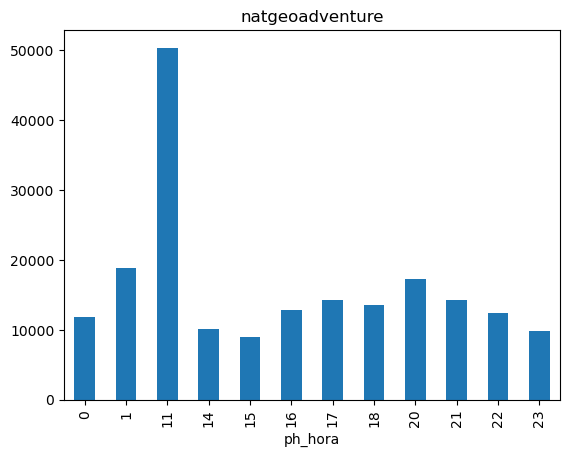

In [71]:
df4cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeoadventure')

<AxesSubplot:title={'center':'natgeoexpeditions'}, xlabel='ph_hora'>

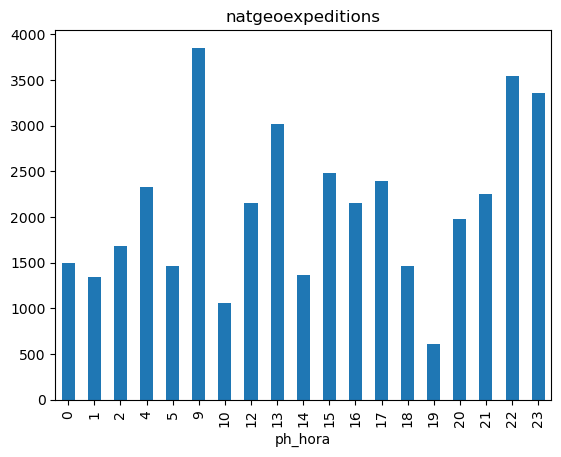

In [72]:
df5cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeoexpeditions')

<AxesSubplot:title={'center':'natgeoyourshot'}, xlabel='ph_hora'>

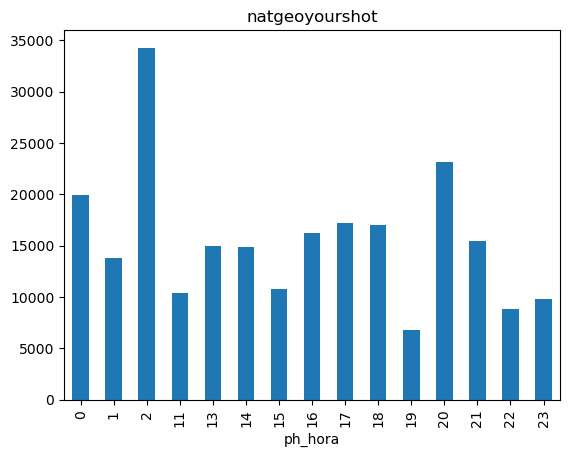

In [73]:
df6cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeoyourshot')

<AxesSubplot:title={'center':'natgeowild'}, xlabel='ph_hora'>

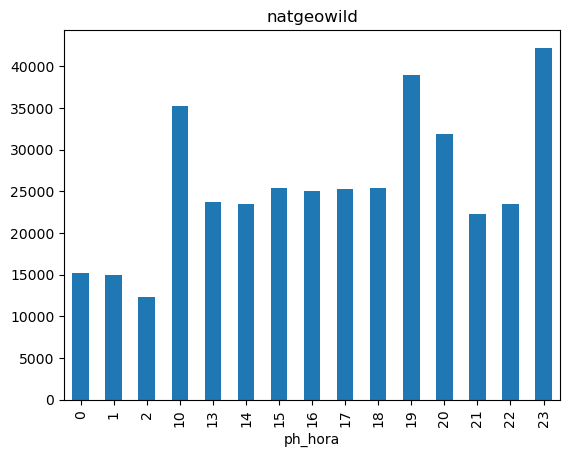

In [74]:
df7cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeowild')

<AxesSubplot:title={'center':'natgeointhefield'}, xlabel='ph_hora'>

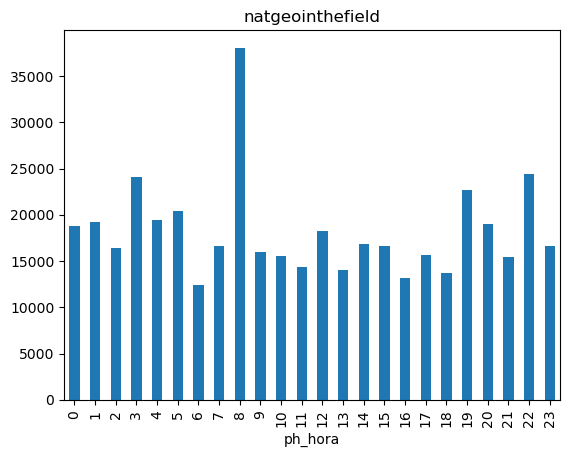

In [75]:
df10cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeointhefield')

<AxesSubplot:title={'center':'natgeoespana'}, xlabel='ph_hora'>

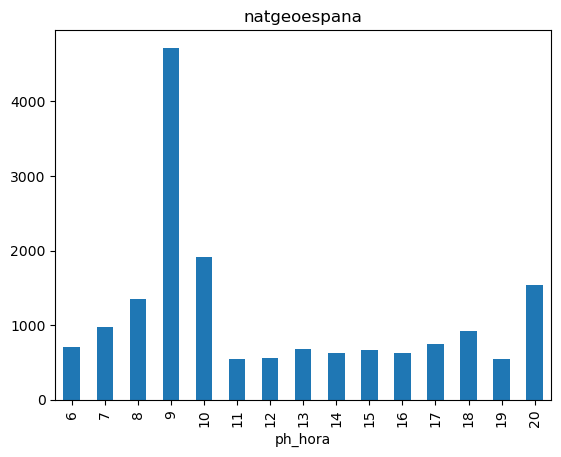

In [76]:
df11cv3_clean.groupby('ph_hora')['ph_likes'].mean().plot(kind='bar', title='natgeoespana')